<a href="https://colab.research.google.com/github/ikyath/CardioVascularDiseaseDetection/blob/master/Cardiovascular_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd


'/content'

In [3]:
ls

drive/  sample_data/


In [0]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix



In [4]:
cd /content/drive/My\ Drive/Data\ Science/Hackathon

/content/drive/My Drive/Data Science/Hackathon


In [0]:
train = pd.read_csv('cardio_train.csv',sep=';')

In [6]:
train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [7]:
train.shape

(69301, 13)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [9]:
train.cholesterol.unique()

array([2, 1, 3])

In [10]:
train.gluc.unique()

array([2, 1, 3])

In [11]:
train.smoke.unique()

array([0, 1])

In [12]:
train.alco.unique()

array([0, 1])

In [13]:
train.active.unique()

array([1, 0])

In [14]:
train.cardio.unique()

array([0, 1])

In [15]:
train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


 Number of Patients

In [16]:
train.shape[0]

69301

 Check for any duplicate entries of patients based on id

In [17]:
(train['id'].value_counts()>=2).sum()

0

In [18]:
train.gender.value_counts()

1    45079
2    24222
Name: gender, dtype: int64

In [19]:
train.cholesterol.value_counts()

1    51868
2     9446
3     7987
Name: cholesterol, dtype: int64

In [20]:
train.gluc.value_counts()

1    58885
3     5277
2     5139
Name: gluc, dtype: int64

In [21]:
train.smoke.value_counts()

0    63199
1     6102
Name: smoke, dtype: int64

In [22]:
train.alco.value_counts()

0    65567
1     3734
Name: alco, dtype: int64

In [23]:
train.active.value_counts()

1    55717
0    13584
Name: active, dtype: int64

The dataset to be classified as target variable is balanced.

In [24]:
train.cardio.value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

In [0]:
features=["age", "height", "weight",'gender','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']

In [0]:
features_vif=["age", "height", "weight",'gender','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']

In [0]:
s_list = ["age", "height", "weight", "ap_hi", "ap_lo"]
def standartization(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 
train_std=standartization(train)
train_std.head()
train=train_std

In [29]:
train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,1.216009,1,-1.140991,-0.361737,0.007562,-0.088051,2,2,0,0,1,0
1,989,-1.953901,1,-0.166016,-0.222688,-0.121657,-0.140934,1,1,0,0,1,1
2,990,0.985795,1,0.077728,-0.292212,-0.057048,-0.088051,1,1,0,0,1,0
3,991,-1.994027,2,0.077728,0.750652,-0.057048,-0.088051,1,1,1,1,1,0
4,992,1.590514,1,-1.140991,-0.848406,-0.057048,-0.088051,1,1,0,0,1,0


In [0]:
# scaler = StandardScaler().fit(train[features])
# df_rescaled = scaler.transform(train[features])

X_train, X_test, y_train, y_test = train_test_split(train[features], train['cardio'], test_size=0.33, random_state=42)

In [0]:
logml = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())


In [33]:
logml.fit().summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:943: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
/usr/local/lib/python3.6/dist-packages/statsmodels/ge

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 cardio   No. Observations:                46431
Model:                            GLM   Df Residuals:                    46419
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 12 May 2020   Deviance:                          nan
Time:                        22:31:47   Pearson chi2:                 1.00e+16
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2605      0.050     -5.261      0.000      -0.358      -0.163
age             0.3684      0.011     34.009      0.000       0.347       0.390
height         -0.0428      0.012     -3.429      0.001      -0.067      -0.018
weight          0.2209      0.012     18.772      0.000       0.198       0.244
gender         -0.0019      0.026     -0.073      0.942      -0.053       0.049
ap_hi           6.4761      0.119     54.582      0.000       6.244       6.709
ap_lo           0.1131      0.024      4.735      0.000       0.066       0.160
cholesterol     0.5253      0.019     28.367      0.000       0.489       0.562
gluc           -0.1264      0.021     -6.007      0.000      -0.168      -0.085
smoke          -0.1223      0.041     -2.978      0.003      -0.203      -0.042
alco           -0.2043      0.050     -4.097      0.000      -0.302      -0.107
active         -0.2063      0.026     -7.970      0.000      -0.257      -0.156
===============================================================================
"""

In [0]:
def vif_cal(input_data,dependent_col):
    vif_df=pd.DataFrame( columns = ['Var','Vif'])
    x_vars=input_data.drop([dependent_col],axis=1)
    xvar_names = x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-rsq),2)
        vif_df.loc[i]=[xvar_names[i],vif]
    return vif_df.sort_values(by='Vif', axis=0, ascending=False,inplace=False)

In [35]:
vif_cal(input_data=train[features_vif],dependent_col="cardio")

,Var,Vif
3,gender,6.56
7,gluc,6.39
6,cholesterol,6.08
10,active,4.21
8,smoke,1.34
1,height,1.32
9,alco,1.20
2,weight,1.13
0,age,1.03
4,ap_hi,1.00


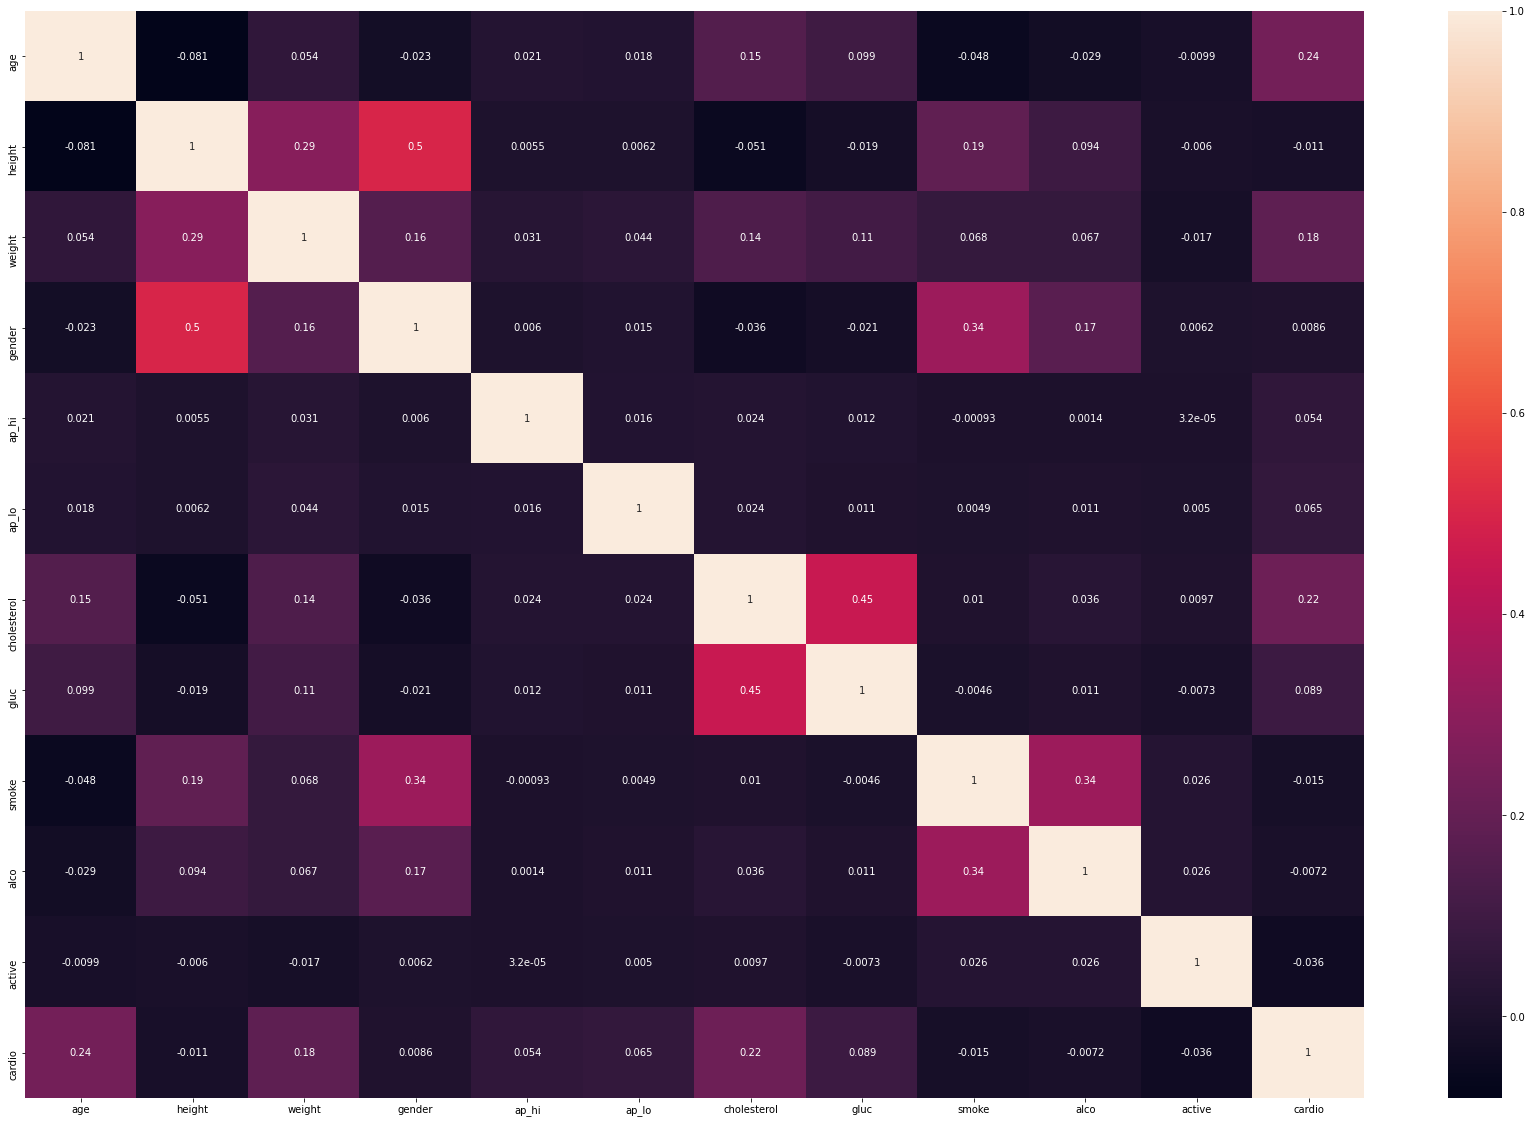

In [38]:
plt.figure(figsize=(30,20))
sns.heatmap(train[features_vif].corr(),annot=True)


In [0]:
logreg = LogisticRegression()


In [41]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_log = logreg.predict(X_test)

In [43]:
print(accuracy_score(y_test,y_pred_log))

0.720507214691736


In [44]:
confusion_matrix(y_test,y_pred_log)

array([[8708, 2670],
       [3722, 7770]])

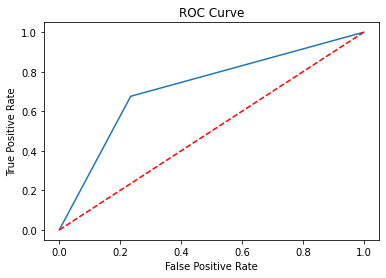

In [45]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_log)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
from sklearn.ensemble import RandomForestClassifier 

In [0]:
RFModel = RandomForestClassifier()

In [48]:
RFModel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred_rf = RFModel.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred_rf)

0.7177525142107565